#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [14]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [20]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 156s 4ms/step - loss: 0.0904 - acc: 0.1085 - val_loss: 0.0898 - val_acc: 0.1318
Epoch 2/12
37500/37500 [==============================] - 152s 4ms/step - loss: 0.0901 - acc: 0.1086 - val_loss: 0.0897 - val_acc: 0.1395
Epoch 3/12
37500/37500 [==============================] - 152s 4ms/step - loss: 0.0899 - acc: 0.1182 - val_loss: 0.0897 - val_acc: 0.1427
Epoch 4/12
37500/37500 [==============================] - 151s 4ms/step - loss: 0.0898 - acc: 0.1220 - val_loss: 0.0896 - val_acc: 0.1502
Epoch 5/12
37500/37500 [==============================] - 6260s 167ms/step - loss: 0.0897 - acc: 0.1262 - val_loss: 0.0895 - val_acc: 0.1573
Epoch 6/12
37500/37500 [==============================] - 153s 4ms/step - loss: 0.0896 - acc: 0.1323 - val_loss: 0.0895 - val_acc: 0.1663
Epoch 7/12
37500/37500 [==============================] - 153s 4ms/step

In [21]:
import matplotlib.pyplot as plt

def show_train_history(train_acc,test_acc, title):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.title(title)
    plt.show()

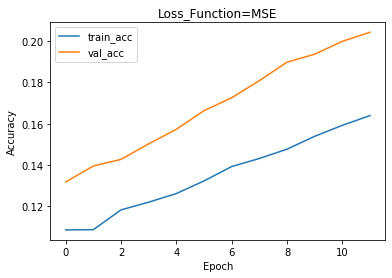

In [22]:
show_train_history('acc','val_acc', 'Loss_Function=MSE')

In [25]:
y_label_pred_OneHot = model.predict(x_img_test)

In [30]:
y_label_pred = [[y_label_pred_OneHot[row].argmax()] for row in range(y_label_pred_OneHot.shape[0])]
y_label_pred = np.array(y_label_pred)
y_label_pred.shape

(10000, 1)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(test, pred, title, cmap=plt.cm.Blues):
    cm = confusion_matrix(test, pred)
    classes = unique_labels(test.ravel(), pred.ravel())
    
    plt.imshow(cm, cmap=cmap)
    plt.colorbar()
    ax = plt.gca()
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]), 
           xticklabels=classes, 
           yticklabels=classes, 
           ylabel='True_label', 
           xlabel='Pred_label', 
           title=title)
    
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i,j], 'd'), ha='center', va='center', color='white' if cm[i, j]>thresh else 'black')
    plt.show()

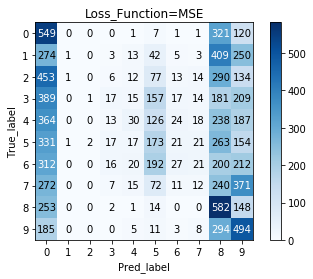

In [32]:
plot_confusion_matrix(y_label_test, y_label_pred, 'Loss_Function=MSE')

In [33]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 169s 4ms/step - loss: 0.3172 - categorical_accuracy: 0.1759 - val_loss: 0.3167 - val_categorical_accuracy: 0.2413
Epoch 2/12
37500/37500 [==============================] - 152s 4ms/step - loss: 0.3129 - categorical_accuracy: 0.1985 - val_loss: 0.3129 - val_categorical_accuracy: 0.2575
Epoch 3/12
37500/37500 [==============================] - 154s 4ms/step - loss: 0.3074 - categorical_accuracy: 0.2170 - val_loss: 0.3082 - val_categorical_accuracy: 0.2746
Epoch 4/12
37500/37500 [==============================] - 156s 4ms/step - loss: 0.3017 - categorical_accuracy: 0.2405 - val_loss: 0.3037 - val_categorical_accuracy: 0.2874
Epoch 5/12
37500/37500 [==============================] - 157s 4ms/step - loss: 0.2970 - categorical_accuracy: 0.2562 - val_loss: 0.2995 - val_categorical_accuracy: 0.2930
Epoch 6/12
37500/37500 [==============================] - 7105s 189ms/step - loss: 0.2935 

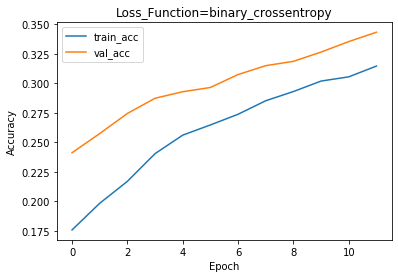

In [35]:
show_train_history('categorical_accuracy','val_categorical_accuracy', 'Loss_Function=binary_crossentropy')

In [36]:
y_label_pred_OneHot = model.predict(x_img_test)

In [37]:
y_label_pred = [[y_label_pred_OneHot[row].argmax()] for row in range(y_label_pred_OneHot.shape[0])]
y_label_pred = np.array(y_label_pred)
y_label_pred.shape

(10000, 1)

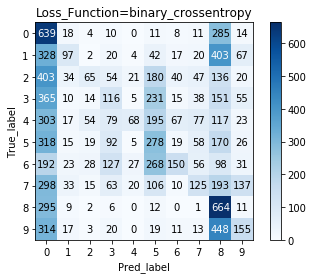

In [38]:
plot_confusion_matrix(y_label_test, y_label_pred, 'Loss_Function=binary_crossentropy')

In [40]:
y_label_test = model.predict_classes(x_img_test)
y_label_test.shape

(10000,)

In [41]:
y_label_test[:10], y_label_pred.ravel()[:10]

(array([5, 8, 8, 8, 5, 6, 5, 2, 0, 0], dtype=int64),
 array([5, 8, 8, 8, 5, 6, 5, 2, 0, 0], dtype=int64))